(sec-qft)=
# Quantum Fourier Transform

Fourier transform (FT) is a ubiquitous mathematical tool used in science, engineering and beyond and we are using it every day without knowing it. Whenever digital signals are processed, the Fourier transform is most likely used including WiFi, cell phone, digital music, digital picture, ..., to name a few.  We wish to calculate the Fourier transform on a quantum computer.  It turns out that quantum computers are not good at calculating general Fourier transform as explained below.  We will focus on a very special case not for the sake of Fourier transform but for other quantum algorithms such as phase estimation.


## Discrete Fourier Transform

The digital signal processes use a particular form  of Fourier transform known as *discrete Fourier transform* defined by

$$
y_n = \frac{1}{\sqrt{N}} \sum_{m=0}^{N-1} x_m e^{2\pi i\, n\, m/N}
$$(DFT)

or writing ti in a matrix from

$$
\begin{bmatrix}y_0\\y_1\\ \vdots \\ y_{N-1}\end{bmatrix} = \frac{1}{\sqrt{N}} 
\begin{bmatrix} 1 & 1 & \cdots & 1 \\ 1 & e^{2\pi i/N} & \cdots & e^{2\pi i (N-1)/N} \\
\vdots & \vdots & \cdots &\vdots \\ 1 & e^{2\pi i (N-1)/N} &\cdots & e^{2\pi i (N-1)^2/N}
\end{bmatrix}
\begin{bmatrix}x_0\\x_1\\ \vdots \\ x_{N-1}\end{bmatrix}
$$(DFT-as-matrix)

where $x_m \in \mathbb{C}$ is the original signal and $y_n \in \mathbb{C}$ is its Fourier transform. 

Writing the column vectors in kets as 

$$
|x\rangle \doteq \begin{bmatrix}x_0\\x_1\\ \vdots \\ x_{N-1}\end{bmatrix}, \qquad
|y\rangle \doteq \begin{bmatrix}y_0\\y_1\\ \vdots \\ y_{N-1}\end{bmatrix}
$$

and the matrix as an operator 

$$
\mathcal{F}_N \doteq \frac{1}{\sqrt{N}} \begin{bmatrix} 1 & 1 & \cdots & 1 \\ 1 & e^{2\pi i/N} & \cdots & e^{2\pi i (N-1)/N} \\
\vdots & \vdots & \cdots &\vdots \\ 1 & e^{2\pi i (N-1)/N} &\cdots & e^{2\pi i (N-1)^2/N}
\end{bmatrix}
$$

which we shall call *Fourier operator* or *Fourier gate*. Now, the Fourier transform can be written in an abstract form

$$
|y\rangle = \mathcal{F}_N |x\rangle .
$$(DFT-as-operator)

It is easy to check that $\mathcal{F}_N \mathcal{F}_N^\dagger = 1$ and thus $\mathcal{F}_N$ is unitary. The inverse Fourier transform is done by $\mathcal{F}^\dagger$ as

$$
|x\rangle = \mathcal{F}_N^\dagger |y\rangle .
$$(DFT-inverse)

A unitary transformation in $N$-dimensional Hilbert space can be implemented as a quantum transformation by 1) preparing a quantum state $|x\rangle$ using a certain basis set, 2) constructing the unitary operator, and 3) reading out $|y\rangle$.  
However, we have a couple of issues here.  First of all,  quantum measurement only gives us $|y_n|$ through the Born rule.  This is not necessarily a fatal limitation since many applications need only the modulus such as power spectrum. Secondly, when $N$ is very large as in the engineering applications, there is no good way to prepare $|x\rangle$  and also finding all $|y_n|$ requires a huge number of quantum measurement.   Unfortunately, the quantum version of DFT seems not feasible for traditional applications.

Nevertheless, the quantum Fourier transform has several useful application such as phase estimation and period finding. It is worth developing a quantum algorithm for $\mathcal{F}_N$.  To do so, we consider the Fourier transform of the computational basis $|u_j\rangle ,\,  j=0,\cdots 2^{n-1}$ where $n$ is the number of qubits.  Writing them  explicitly in the computational bases, 

$$
|u_j\rangle=|j_n\, j_{n-1}\, \cdots\, j_1\rangle \equiv  |j_n\rangle \otimes |j_{n-1}\rangle \otimes \cdots \otimes |j_1\rangle
$$

where the individual qubit takes values $j_i \in \{0,1\}$ and $j$ is decimal expression of the binary string $j_1\, j_2,\cdots\, j_n$, that is

$$
j=2^{n-1} j_{n} + 2^{n-2} j_{n-1} +\cdots+ j_1 = \sum_{\ell=1}^{n} 2^{\ell-1} j_\ell
$$(decimal-binary)

For $n=2$, there are four basis kets $|u_0\rangle=|00\rangle,\, |u_1\rangle=|01\rangle,\,  |u_2\rangle=|10\rangle,\, |u_3\rangle=|11\rangle$.

When the Fourier operator is applied to the computational basis we obtain a new basis 

$$
|w_j\rangle = \mathcal{F}_N |u_j\rangle .
$$(QFT)

We can construct a quantum circuit for the Fourier operator $\mathcal{F}_N$ from Eq.  {eq}`QFT`.  Once we obtained the circuit or the Fourier gate, we can apply it to other states.  
In literature  "quantum Fourier transform" often means  Eq.{eq}`QFT` or the Fourier gate $\mathcal{F}_N$ rather than the general Fourier transform {eq}`DFT-as-operator`.

**Exercise** {numref}`%s <sec-qft>`.1&nbsp;  Show that $|k_j\rangle$ forms an orthonormal basis set.

## The QFT algorithm

Now we construct the Foureir operator. 
First, we compute Eq. {eq}`QFT` explicitly in the computational basis.


**N=2**  
Let us consider $n=1$, the simplest QFT transforms the computational basis $0\rangle$ and $|1\rangle$ as

$$
\begin{align}
\mathcal{F}_2 |u_0\rangle &= \mathcal{F}_2 |0\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle +  e^{i 0} |1\rangle\right) = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right)\\
\mathcal{F}_2 |u_1\rangle &= \mathcal{F}_2 |1\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle + e^{i \pi}|1\rangle\right) = \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right).
\end{align}
$$(qft2)

We want to find a quantum circuit that does the same transformation. Recalling that

$$
\begin{align}
H |0\rangle &= \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
H |1\rangle &= \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right) 
\end{align}
$$(hgate-as-qft2)

By direct comparison between Eqs. {eq}`qft2` and {eq}`hgate-as-qft2`, it is clear that $\mathcal{F}_2 = H$. We learned in {numref}`sec-hgate` that the Hadamard gate transforms the computational basis to the $x$-basis. That transformation turned out to be the lowest order QFT and  we have already computed it.   See {numref}`sec-hgate-qft`.

**N=4**  

We need more examples to get an idea of $\mathcal{F}_N$..  Let us try $n=2$.

$$
\begin{align}
\mathcal{F}_2 |u_0\rangle &=\mathcal{F}_2 |00\rangle = \frac{1}{2} \left(|00\rangle + |01\rangle  +|10\rangle + |11\rangle\right)\\ &= \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \otimes
\frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
\mathcal{F}_2 |u_1\rangle &= \mathcal{F}_2 |01\rangle = \frac{1}{2} \left(|00\rangle + e^{i \pi/2}|01\rangle + e^{i \pi}|10\rangle + e^{i 3\pi/2}|11\rangle \right)\\
&= \frac{1}{2} \left(|00\rangle + i |01\rangle  - |10\rangle  -i |11\rangle \right)\\& = \frac{1}{\sqrt{2}} \left(|0\rangle -  |1\rangle\right) \otimes \frac{1}{\sqrt{2}} \left(|0\rangle + i |1\rangle\right) \\
\mathcal{F}_2 |u_2\rangle &= \mathcal{F}_2 |10\rangle = \frac{1}{2} \left(|00\rangle + e^{i \pi}|01\rangle + e^{2 i \pi}|10\rangle + e^{i 3 \pi}|11\rangle \right) \\
&= \frac{1}{2} \left(|00\rangle - |01\rangle +|10\rangle - |11\rangle \right) \\
&=  \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \otimes \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right)\\
\mathcal{F}_2 |u_3\rangle &= \mathcal{F}_2 |11\rangle = \frac{1}{2} \left(|00\rangle + e^{i 3\pi/2}|01\rangle + e^{3 i \pi}|10\rangle + e^{i 9 \pi/2} |11\rangle \right) \\
&= \frac{1}{2} \left(|00\rangle - i|01\rangle - |10\rangle + i |11\rangle \right) \\
&=  \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right) \otimes \frac{1}{\sqrt{2}} \left(|0\rangle -i |1\rangle\right)
\end{align}
$$(qft4)

The corresponding quantum circuit seems complicated since phase factor $\pm i$ are now involved.  We recall that $S$ gate does the job. 

$$
\begin{align}
S \cdot H |0\rangle &= \frac{1}{\sqrt{2}}\left(|0\rangle + i |1\rangle\right) \\
S \cdot H |1\rangle &= \frac{1}{\sqrt{2}}\left(|0\rangle - i |1\rangle\right) 
\end{align}
$$(s-h-gates)

Using eqs. {eq}`hgate-as-qft2` and {eq}`s-h-gates`, we try the following transformations


$$
\begin{align}
H \otimes H |00\rangle & = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \otimes
\frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
(S\cdot H) \otimes H |01\rangle & = \frac{1}{\sqrt{2}}\left(|0\rangle + i |1\rangle\right)  \otimes
 \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right) \\
H \otimes H |10\rangle & = \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right) \otimes
\frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
(S\cdot H) \otimes H |11\rangle & = \frac{1}{\sqrt{2}}\left(|0\rangle - i |1\rangle\right)  \otimes
 \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right) 
\end{align}
$$

The results are close to the Fourier transform but the order of the output bits are wrong.  We need to swap the qubits.  Another issue is that $S$ gates is applied to $|01\rangle$ and $|11\rangle$.  Noting that the second qubit is $1\rangle$.  Hence, we can use the controlled-S gate with the second qubit as the control.

$$
\begin{align}
SWAP \cdot (H \otimes I) \cdot CS \cdot (I \otimes H) |00\rangle & = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \otimes
\frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
SWAP \cdot (H \otimes I) \cdot CS \cdot (I \otimes H)  |01\rangle & = \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right) \otimes  \frac{1} {\sqrt{2}}\left(|0\rangle + i |1\rangle\right) 
 \\
SWAP \cdot (H \otimes I) \cdot CS \cdot (I \otimes H) |10\rangle  & = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right)  \otimes
 \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right) \\
SWAP \cdot (H \otimes I) \cdot CS \cdot (I \otimes H) |11\rangle & =  \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right)   \otimes
\frac{1}{\sqrt{2}}\left(|0\rangle - i |1\rangle\right)
\end{align}
$$(qft4-gates)

Now, the Fourier transform {eq}`qft4` and The circhuit {eq}`qft4-gates` produces the same outputs.  Hence, $\mathcal{F}_4 = SWAP \cdot (H \otimes I) \cdot CS \cdot (I \otimes H)$.

In [1]:
from qiskit import *
from qiskit.circuit.library.standard_gates import SGate
qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)
cs=SGate().control(1)
qc.h(1)
qc.append(cs,[0,1])
qc.h(0)
qc.swap(0,1)
qc.draw()

┌───┐   
q_0: ───────■──┤ H ├─X─
     ┌───┐┌─┴─┐└───┘ │ 
q_1: ┤ H ├┤ S ├──────X─
     └───┘└───┘

In the following example, all four transformations {eq}`qft2` are computed using Qiskit.

In [2]:
import numpy as np
from qiskit import *

# qiskit does not have predefined controlled-S gate
# In this application we use an equivalent gate controlled-P gate.

def QFT():
    # define the Fourier gate    
    qc.h(1)
    qc.cp(np.pi/2,0,1)
    qc.h(0)
    qc.swap(0,1)


In [3]:
# for |00>
qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)
    
# apply the Fourier gate
QFT()

# Show the Fourier transform
from qiskit.quantum_info import Statevector
psi=Statevector(qc)
print("Fourier transform of |00>")
psi.draw('latex')

Fourier transform of |00>


<IPython.core.display.Latex object>

In [4]:
# for |01>
qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)
    
qc.x(0)
QFT()
psi=Statevector(qc)
print("Fourier transform of |01>")
psi.draw('latex')

Fourier transform of |01>


<IPython.core.display.Latex object>

In [5]:
# for |10>
qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)
    
qc.x(1)
QFT()
psi=Statevector(qc)
print("Fourier transform of |10>")
psi.draw('latex')

Fourier transform of |10>


<IPython.core.display.Latex object>

In [6]:
# for |11>
qr=QuantumRegister(2,'q')
qc=QuantumCircuit(qr)
    
qc.x([0,1])
QFT()
psi=Statevector(qc)
print("Fourier transform of |10>")
psi.draw('latex')

Fourier transform of |10>


<IPython.core.display.Latex object>

**Higher order QFT**  

Now we have some good idea about QFT. Now, we try to find $\mathcal{F}_N$.  The derivation is a bit complicated but the extension of the $N=4$ case.  First, we evaluate $\mathcal{F}_N |j\rangle$.

$$
\begin{align}
\mathcal{F}_N |j\rangle  = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi i\, j\, k /2^n} |k\rangle \\
& = \sum_{k=0}^{N-1} e^{2\pi i\, j\,\sum_{\ell=1}^{n} k_\ell/2^\ell} |k_1\, k_2\, \cdots\, k_n \rangle \\
& = \left (\sum_{k_1=0}^1 e^{2 \pi i\, j\, k_1/2} |k_1\rangle\right) \otimes \left (\sum_{k_2=0}^1 e^{2 \pi i\, j, k_2/2^2} |k_2\rangle\right)\otimes \cdots \otimes \left (\sum_{k_n=0}^1 e^{2 \pi i\,j\' k_n/2^n} |k_n\rangle\right) \\
& = \left(|0\rangle + e^{2 \pi i\, j /2} |1\rangle \right) \otimes \left(|0\rangle + e^{2 \pi i\, j /2^2 } |1\rangle \right) \otimes \cdots \otimes \left(|0\rangle + e^{2 \pi i\, j /2^n}|1\rangle \right) 
\end{align}
$$

The results look quite similar to Eq. {eq}`qft4`.  Only the difference is the phase angles.  The question is how we calculate the phase angle. Let us take a closer look at a phase factor $e^{2 \pi i\, j /2^k},\, 1 \le k \le n$.  Using Eq. {eq}`decimal-binary`,

$$
e^{2\pi i\, j /2^k} = e^{2 \pi i\, \sum_{\ell=1}^{n} 2^{\ell-1-k} j_\ell } = e^{2\pi i , j_1 /2^k} e^{2\pi i\,j_2/2^{k-1}} \cdots e^{2\pi i\, j_k/2} e^{2 \pi i j_{k+1}} \cdots e^{2\pi i\, j_{n} (n-1-k)} = e^{2\pi i\, j_1/2^k} e^{2\pi i\, j_2 /2^{k-1}} \cdots e^{2\pi i\, j_k/2}
$$

We need to apply the phase rotation of angle $k$ different phase angle $2\pi j_\ell /2^{ell-1-k},\, 1 \le \ell \le k$.  No rotation is needed when $\ell > k$ or $j_\ell=0$.  Hence, we apply the controlled phase gate $CP(2\pi/2^{\ell-1-k})$ only when $j_\ell=0$.  In conclusion, apply $H$ to $k$-th qubit and apply controlled-$P$ gate  $k$ times with appropriate angles.  Repeat this from $k=n$ to $k=1$ in the backward so that source qubits of controlled $P$ gate is not modified before the controlled operation.  As you saw in $\mathcal{F}_4$, the order of the qubits is wrong after these operations.  Hence, we reverse the order by applying swap gates.

The following circuit is equivalent to $\mathcal{F}_8$

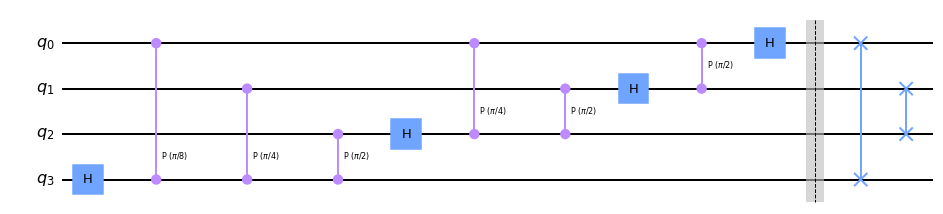

In [7]:
import numpy as np
from qiskit import *
qr=QuantumRegister(4,'q')
qc=QuantumCircuit(qr)

# qubit 3
qc.h(3)
qc.cp(np.pi/8,0,3)
qc.cp(np.pi/4,1,3)
qc.cp(np.pi/2,2,3)

# qubit 2
qc.h(2)
qc.cp(np.pi/4,0,2)
qc.cp(np.pi/2,1,2)

# qubit 1
qc.h(1)
qc.cp(np.pi/2,0,1)

# qubit 0
qc.h(0)

qc.barrier(range(4))

# reordering
qc.swap(0,3)
qc.swap(1,2)

qc.draw('mpl')


---
Last modified: 07-19-2022